## <img src="./fiuba.jpg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 2
#### Santiago Germino

***
## Filtrado


<div class="alert alert-block alert-info">
<b>1)</b> Para el siguiente filtro digital se pide:

</div>

 $$ y(k) = \frac{1}{N} \sum_{i=0}^{N-1} x(k-i)  $$
 
 Para N = [3; 5]

   a) El diagrama de polos y ceros y su respuesta de módulo y fase



<img src="./1a1.jpg" align="center" width="80%" /> 
<img src="./1a2.jpg" align="center" width="80%" />


   b) Corrobore su respuesta mediante la simulación computacional


In [88]:
## Inicialización del Notebook del TP4

import numpy as np
from pandas import DataFrame
from IPython.display import HTML
from scipy import signal as sig

from  matplotlib import patches

# Insertar aquí el código para inicializar tu notebook
########################################################

import matplotlib as mpl
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.dpi'] = 120

import matplotlib.pyplot as plt


def vertical_flaten(a):
    return a.reshape(a.shape[0],1)


## Funcion para dibujar el plano Z
def zplane(b,a,title,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)
    
    ax.set_title (title)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k


def dibujarFrecuenciaFase (b, a):
    # Respuesta en frecuencia y fase
    w, h = sig.freqz (b, a)
    fase = np.unwrap (np.angle(h))

    fig, ax1 = plt.subplots ()

    ax1.set_title   ('Respuesta en frecuencia y fase para FIR.\nh' + str(b) + '.')
    ax1.plot        (w, (abs(h)), 'b')
    ax1.set_ylabel  ('$H(E^jw)$', color='b')
    ax1.set_xlabel  ('Frecuencia [rad/sample]')
    ax2 = ax1.twinx ()
    ax2.plot        (w, fase, 'g')
    ax2.set_ylabel  ('Fase [rad]', color='g')
    ax1.grid        ()
    ax1.axis        ('tight')
    plt.show        ()

    # Diagrama de polos y ceros
    z,p,k = zplane (b,a, "Diagrama de polos y ceros.\nCeros en " + str(np.roots(b)))
    
    
def dibujarRespuestaFiltro (filter_coeff, filter_type):
    plt.plot   (filter_coeff, 'bo-', linewidth=2)
    plt.title  ('Coeficientes del filtro ' + filter_type + ': ' + str(len(filter_coeff)))
    plt.show   ()

    w, h = scipy.signal.freqz (filter_coeff, worN=8000)
    plt.plot   ((w / np.pi) * (Fs / 2), np.absolute(h), linewidth=2)
    plt.title  ('Respuesta en frecuencia del filtro ' + filter_type)
    plt.xlabel ('Frecuencia [Hz]')
    plt.ylabel ('Ganancia')
    plt.ylim   (-0.05, 1.05)
    plt.grid   (True)
    plt.show   ()

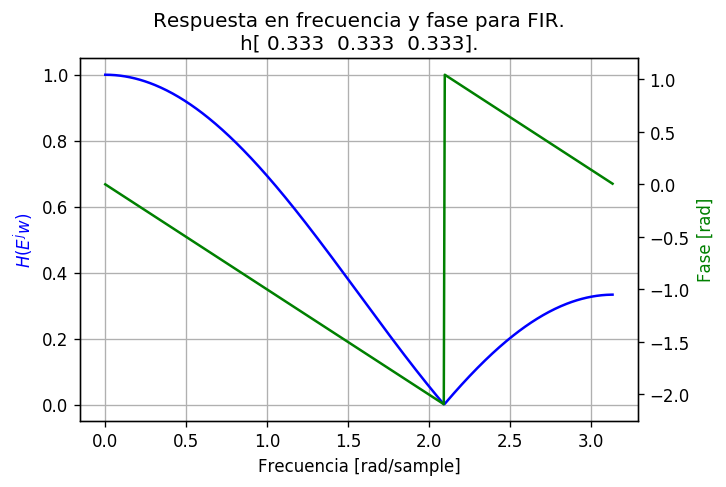

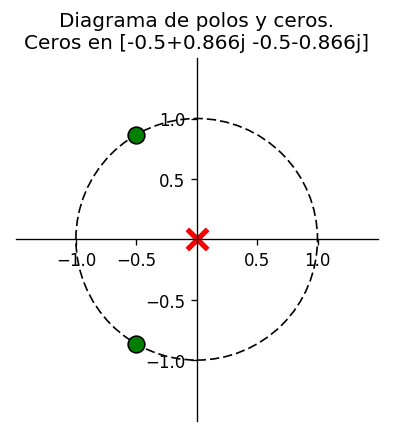

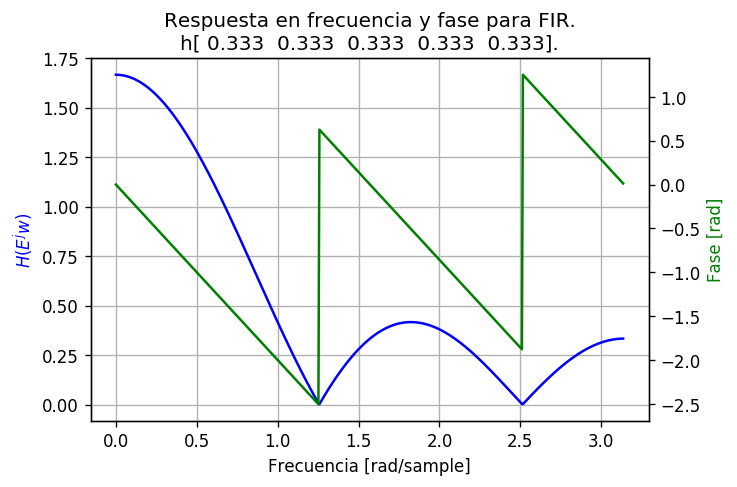

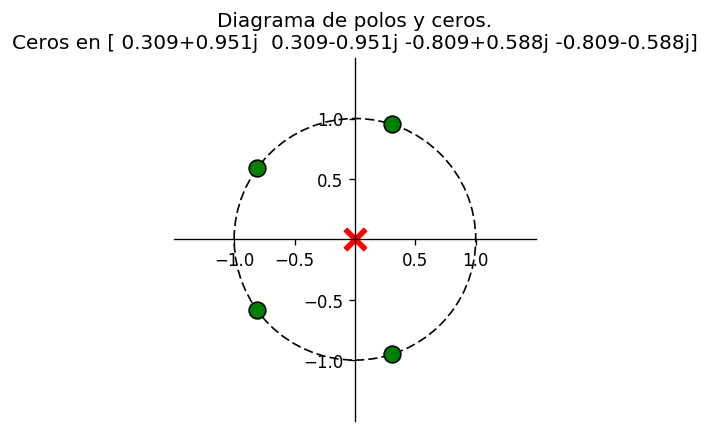

In [14]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
np.set_printoptions (precision = 3)

##########################################
# Ejercicio 1.b.                         #
##########################################

# Para N = 3
#
# b : h[n] = [1/3, 1/3, 1/3]
# a : Salida en 1, 0, 0 para filtro FIR
b = np.array ([1/3, 1/3, 1/3])
a = np.array ([1, 0, 0])

dibujarFrecuenciaFase (b, a)

# Para N = 5
#
# b : h[n] = [1/3, 1/3, 1/3, 1/3, 1/3]
# a : Salida en 1, 0, 0 para filtro FIR
b = np.array ([1/3, 1/3, 1/3, 1/3, 1/3])
a = np.array ([1, 0, 0, 0, 0])

dibujarFrecuenciaFase (b, a)

<div class="alert alert-block alert-info">
<b>2)</b> Para el siguiente filtro digital se pide:

</div>


$$ h(k) = (-1, 1) $$
 


   a) El diagrama de polos y ceros y su respuesta de módulo y fase



<img src="./2a.jpg" align="center" width="80%" /> 


   b) Corrobore su respuesta mediante simulación computacional


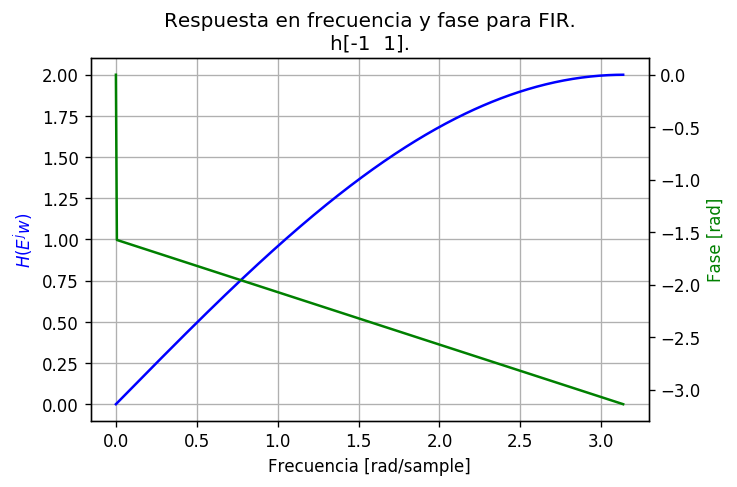

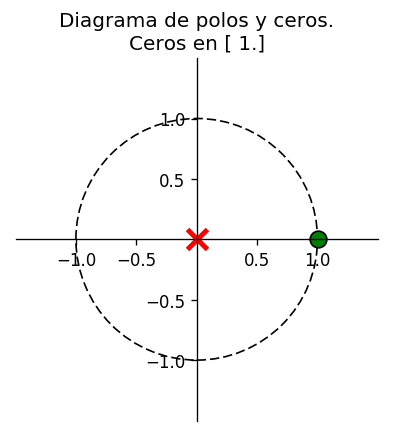

In [11]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
np.set_printoptions (precision = 3)

##########################################
# Ejercicio 2.b.                         #
##########################################

# b : h[n] = [-1, 1]
# a : Salida en 1, 0 para filtro FIR
b = np.array ([-1, 1])
a = np.array ([1, 0])

dibujarFrecuenciaFase (b, a)

<div class="alert alert-block alert-info">
<b>3)</b> Para el siguiente filtro digital se pide:

</div>


<img src="./comb.png" align="center" width="30%" /> 


Para $N= (2; 4)$ y $b = -1$

   a) El diagrama de polos y ceros y su respuesta de módulo y fase



<img src="./3a.jpg" align="center" width="80%" /> 


   b) Corrobore su respuesta mediante simulación computacional


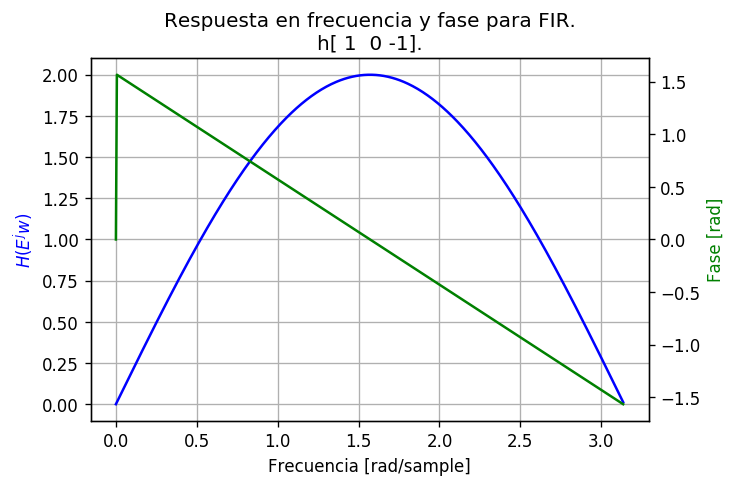

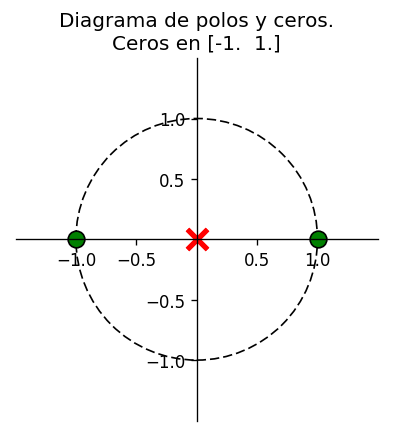

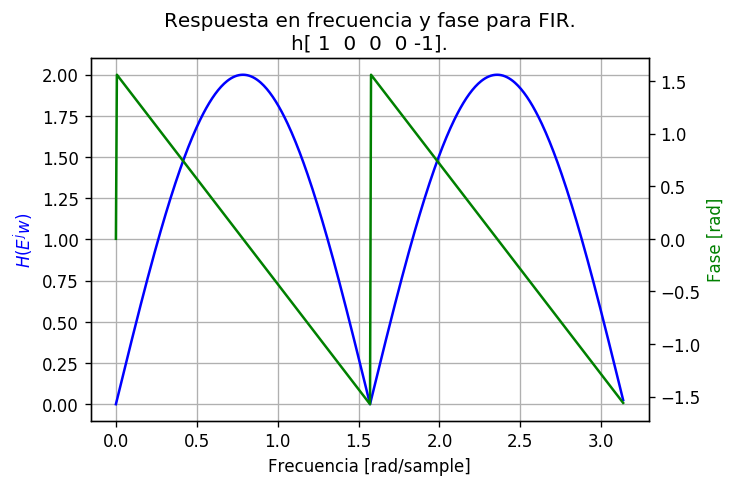

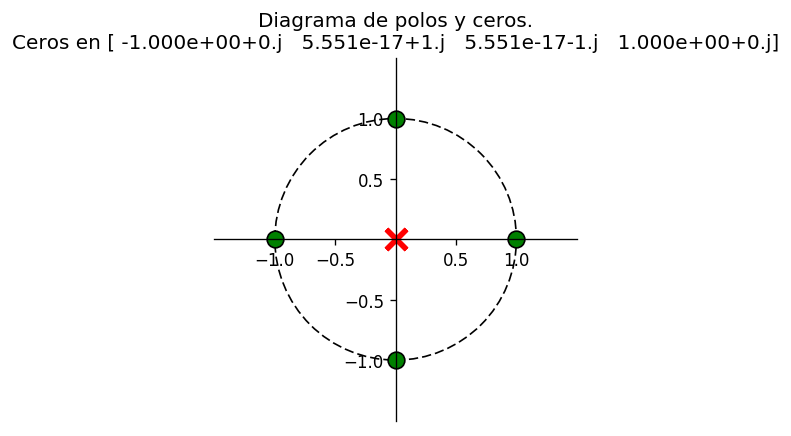

In [15]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
np.set_printoptions (precision = 3)

##########################################
# Ejercicio 3.b.                         #
##########################################

# Para N = 2
#
# b : h[n] = [1, 0, -1]
# a : Salida en 1, 0, 0 para filtro FIR
b = np.array ([1, 0, -1])
a = np.array ([1, 0, 0])

dibujarFrecuenciaFase (b, a)

# Para N = 4
#
# b : h[n] = [1, 0, 0, 0 -1]
# a : Salida en 1, 0, 0, 0, 0 para filtro FIR
b = np.array ([1, 0, 0, 0, -1])
a = np.array ([1, 0, 0, 0, 0])

dibujarFrecuenciaFase (b, a)

<div class="alert alert-block alert-info">
<b>4)</b> En el archivo <i>ECG_TP4.mat</i> encontrará un registro electrocardiográfico (ECG) registrado durante una prueba de esfuerzo, junto con una serie de variables descriptas a continuación. Diseñe y aplique los filtros digitales necesarios para mitigar las siguientes fuentes de contaminación:
</div>

 - Ruido causado por el movimiento de los electrodos (Alta frecuencia)
 - Ruido muscular (Alta frecuencia)
 - Movimiento de la línea de base del ECG, inducido en parte por la respiración (Baja frecuencia)
 

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Los latidos presentes en el registro de ECG, alineados y clasificados (de origen normal y ventricular) poseen las siguientes características temporales y frecuenciales:
</div>


<img src="./latidos_tiempo.png" align="center" width="80%" /> 

<img src="./latido_promedio.png" align="center" width="80%" /> 

<img src="./latidos_espectro.png" align="center" width="80%" /> 


### Archivo *ECG_TP4.mat*
(variables)
 - **ecg_lead**: Registro de ECG muestreado a $fs=1$ KHz durante una prueba de esfuerzo
 - **qrs_pattern1**: Complejo de ondas QRS normal
 - **heartbeat_pattern1**: Latido normal
 - **heartbeat_pattern2**: Latido de origen ventricular
 - **qrs_detections**: vector con las localizaciones (en # de muestras) donde ocurren los latidos
 
a) Establezca una plantilla de diseño para los filtros digitales que necesitará para que la señal de ECG se asemeje a los latidos promedio en cuanto a *suavidad* de los trazos y nivel isoeléctrico nulo.
 

In [98]:
# Defina la plantilla del filtro

######################################
# Se usan dos filtros, ver Respuesta #
######################################

# fs0 = ?? # fin de la banda de detenida 0
# fc0 = ?? # comienzo de la banda de paso
# fc1 = ?? # fin de la banda de paso
# fs1 = ?? # comienzo de la banda de detenida 1

b) ¿Cómo obtuvo dichos valores? 
 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Analizando la señal patron en el tiempo y el espectro, estimo que un filtro pasaalto para bloquear las frecuencias hasta 3 Hz y un pasabajo para bloquear las frecuencias mayores a 35 Hz cumplirian con la consigna propuesta. A continuacion se adjuntan capturas de pantalla del diseño y respuesta en frecuencia de los filtros con la aplicacion pyFDA.
</div>

<img src="./FIR_pasaalto_pyFDA.png" align="center" width="80%" /> 
<img src="./FIR_pasabajo_pyFDA.png" align="center" width="80%" /> 

c) Diseñe **al menos** dos filtros FIR y dos IIR para su comparación. Verifique que la respuesta en frecuencia responda a la plantilla de diseño
  

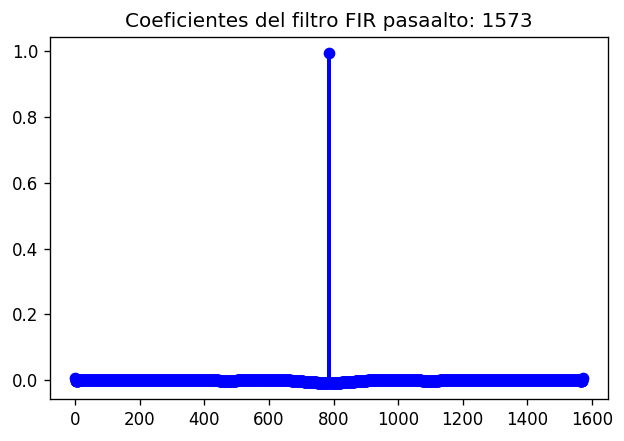

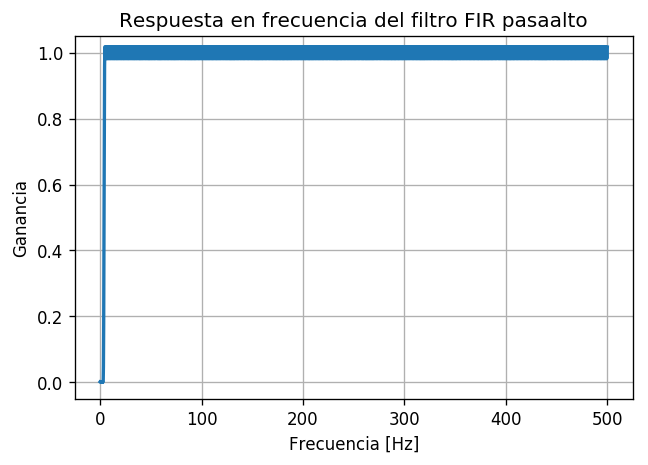

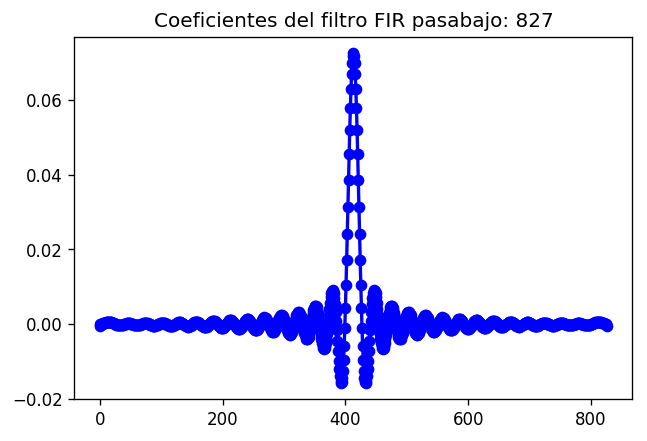

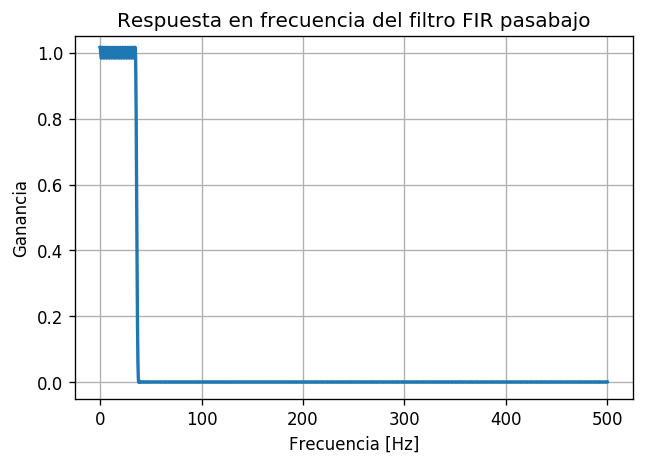

In [97]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
import scipy.io as sio
import scipy.signal

Fs = 1000
# tiempo de muestreo
Ts = 1 / Fs   

# Carga de coeficientes de los filtros pasabajo y pasaalto
FIR_highpass_coeff = np.genfromtxt ('FIR_pasaalto.csv')
FIR_lowpass_coeff  = np.genfromtxt ('FIR_pasabajo.csv')

# NOTA: pyFDA no me permite realizar un filtro IIR pasaalto con las especificaciones que busco

dibujarRespuestaFiltro (FIR_highpass_coeff, 'FIR pasaalto')
dibujarRespuestaFiltro (FIR_lowpass_coeff, 'FIR pasabajo')

d) Evalúe el rendimiento de los filtros que haya diseñado: 

 1. Verifique que filtra las señales interferentes
 2. Verifique que es inocuo en las zonas donde no hay interferentes



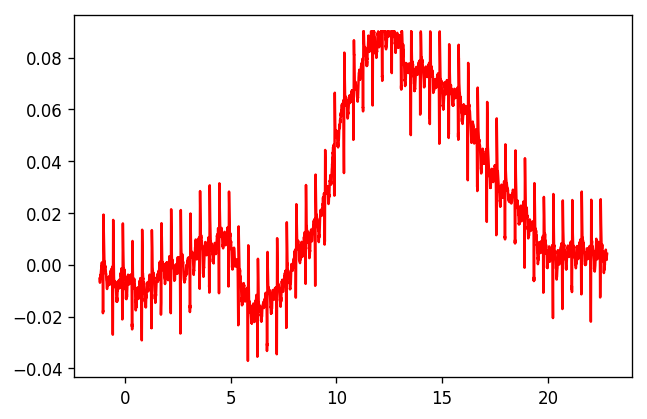

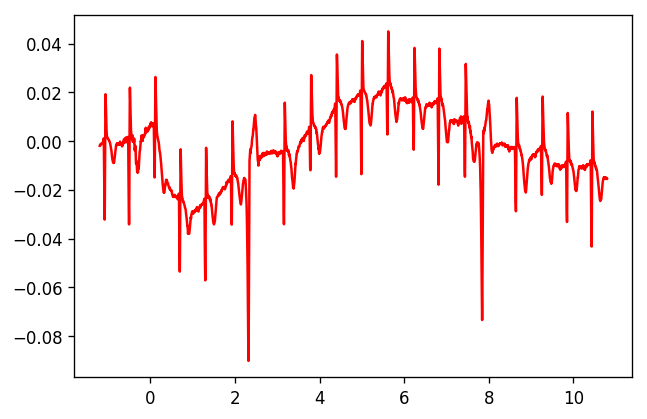

In [99]:
# Segmentos de interés #
########################
# Puede tomar como referencia los siguientes segmentos, aunque si lo considera, también
# puede incluir otros que considere importantes para evaluar el rendimiento.

zonas_con_interf_baja_frec = ( 
        np.array([12, 12.4]) *60*Fs, # minutos a muestras
        np.array([15, 15.2]) *60*Fs, # minutos a muestras
        )


zonas_sin_interf = ( 
        np.array([5, 5.2]) *60*Fs, # minutos a muestras
        [4000, 5500], # muestras
        [10e3, 11e3], # muestras
        )

##########################################
# Acá podés generar los gráficos pedidos #
##########################################
# para listar las variables que hay en el archivo
#io.whosmat('ECG_TP4.mat')
mat_struct = sio.loadmat('./ECG_TP4.mat')

# Segmentos de la captura con interferencia de baja frecuencia
ecg_one_lead_lfi = [ [], [] ]
ecg_one_lead_lfi[0] = vertical_flaten(mat_struct['ecg_lead'])[720000:744000]
ecg_one_lead_lfi[1] = vertical_flaten(mat_struct['ecg_lead'])[900000:912000]

#amin, amax = min(ecg_one_lead_lfi[0]), max(ecg_one_lead_lfi[0])
#for i, val in enumerate(ecg_one_lead_lfi[0]):
#    ecg_one_lead_lfi[0][i] = (val-amin) / (amax-amin)

# Cantidad de muestras
N = [ [], [] ]

# Senal filtrada
ecg_one_lead_lfi_bfilt = [ [], [] ]


for i in range(len(ecg_one_lead_lfi)):
    
    N[i] = len (ecg_one_lead_lfi[i])
    t    = np.arange (N[i]) / Fs
    
    # Filtrado en cadena (pasaalto y pasabajo)
    ecg_one_lead_lfi_bfilt[i] = scipy.signal.lfilter (FIR_highpass_coeff, 1.0, ecg_one_lead_lfi[i])
    ecg_one_lead_lfi_bfilt[i] = scipy.signal.lfilter (FIR_lowpass_coeff, 1.0, ecg_one_lead_lfi_bfilt[i])

    # Demora de grupo de la señal filtrada
    delay  = 0.5 * (len(FIR_highpass_coeff) - 1) / Fs
    delay += 0.5 * (len(FIR_lowpass_coeff)  - 1) / Fs
        
    # Señal original 
    ##########################################################
    # NO NORMALIZADA, SE VA DE ESCALA CON RESPECTO A FILTRADA!
    ##########################################################
    # plt.plot (t, ecg_one_lead_lfi[0])
    
    # Señal filtrada con corrimiento para compensar demora de grupo
    plt.plot (t-delay, ecg_one_lead_lfi_bfilt[i], 'r-')
    plt.show ()

    
#plt.plot(ecg_one_lead[5000:12000])
#hb_1 = vertical_flaten(mat_struct['heartbeat_pattern1'])
#plt.figure(3)
#plt.plot(hb_1)
#plt.show ()


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Cargue los coeficientes de los filtros diseñados segun el criterio explicado en 4b y realice el filtrado. La idea era hacer la comparacion y ajustar los filtros segun sea necesario, pero no estoy pudiendo normalizar la señal ECG capturada para hacer una comparacion directa en el mismo grafico (como hice en el examen) y lamentablemente se me termino el tiempo para seguir y seguir probando e indagando cosas sobre esta herramienta :'(
</div>

<div class="alert alert-block alert-info">
<b>5)</b> Utilice las siguientes metodologías <b>no lineales</b> de estimación-substracción para la remoción de la interferencia de línea de base, y compare con las técnicas lineales del punto anterior en las mismas regiones. Luego discuta las ventajas y desventajas de cada técnica.
</div>

a) Estimación del movimiento de línea de base a partir del filtrado de mediana. A partir de la siguiente estimación del movimiento de línea de base 

$$ \hat{b} = \mathop{med}_{600} \{ \mathop{med}_{200} \{s\} \} $$

Donde $s$ representa la señal de ECG a partir de la que estimamos el movimiento de la línea de base $ \hat{b}$. El operador $\mathop{med}_{200}$ calcula muestra a muestra la mediana en los 200 ms previos a la muestra actual. Luego dicha estimación la substraemos para estimar la actividad eléctrica cardíaca $\hat{x}$

$$ \hat{x} = s - \hat{b} $$


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar la implementación del <a href="https://docs.scipy.org/doc/scipy/reference/tutorial/signal.html#median-filter">filtro de mediana provista en <b>scipy.signal</b></a>
</div>

In [ ]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################




<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

b) Estimación del movimiento de línea de base a partir de los segmentos isoeléctricos de cada latido. A partir de las detecciones provistas, puede estimar aproximadamente el nivel isoeléctrico, es decir el momento donde la actividad eléctrica cardíaca es **nula**. El intervalo entre la onda P y Q, es un buen momento para estimar las características de las señales interferentes que originan el movimiento de la línea de base.

<img src="./pq.png" align="center" width="80%" /> 

Para la localización del segmento PQ puede valerse de la localización de cada latido (líneas rojas verticales) y a partir de la misma, anticipar un tiempo adecuado de manera tal de no incluir la onda P ni Q. Puede ayudarse con el latido promedio de un latido normal para establecer dicho intervalo.

Recuerde que la señal de línea de base debe estar muestreada a la misma frecuencia que el ECG, por lo que debería remuestrear dicha señal (puede usar la función de interpolación spline para ello).

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar la función de interpolación <a href="https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.interpolate.CubicSpline.html">spline <b>scipy.interpolate.CubicSpline</b></a>
</div>

In [ ]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################




<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<div class="alert alert-block alert-info">
<b>6)</b> Para la señal de ECG provista junto con este documento, aplique el concepto de <b>filtro adaptado</b> y otras técnicas de filtrado digital para diseñar un detector de latidos. Los patrones provistos son:

</div>


 - **qrs_pattern1**: Complejo de ondas QRS normal
 - **heartbeat_pattern1**: Latido normal
 - **heartbeat_pattern2**: Latido de origen ventricular
 

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Revise el concepto de filtro adaptado en <a href="http://en.wikipedia.org/wiki/Matched_filter">Wikipedia</a>, o la bibliografía de la materia (Porat 14.4.9).
</div>

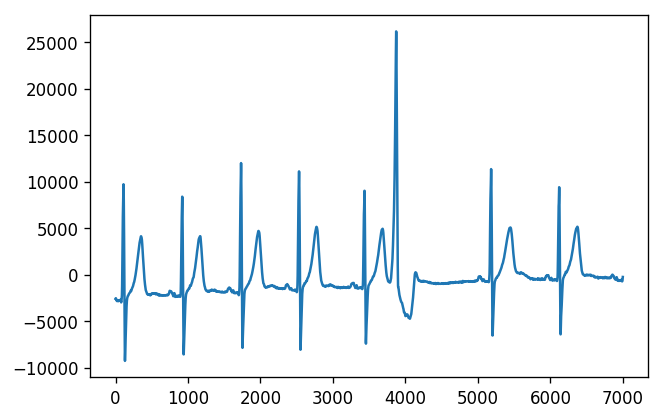

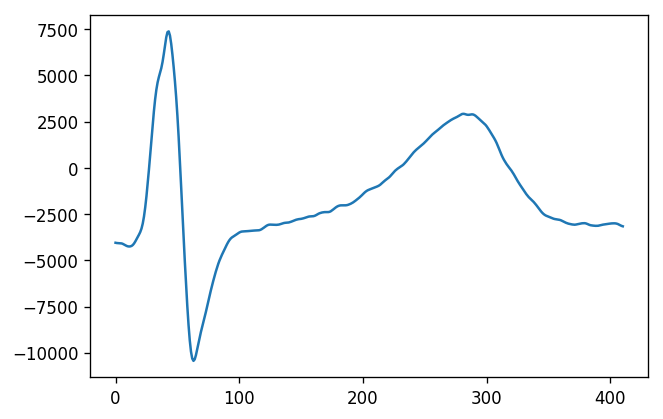

In [17]:
import scipy.io as sio

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

# para listar las variables que hay en el archivo
#io.whosmat('ECG_TP4.mat')
mat_struct = sio.loadmat('./ECG_TP4.mat')

ecg_one_lead = vertical_flaten(mat_struct['ecg_lead'])
N = len(ecg_one_lead)

hb_1 = vertical_flaten(mat_struct['heartbeat_pattern1'])

plt.figure(1)
plt.plot(ecg_one_lead[5000:12000])

plt.figure(2)
plt.plot(hb_1)
plt.show ()


a) Explique conceptualmente cómo podría realizar un detector de latidos con la señal resultante del filtro adaptado. Discuta la utilidad y limitaciones de este método. 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

   
   b) Realice la detección de los latidos, comparando las detecciones obtenidas con las que se incluyen en la variable **qrs_detections**. Proponga alguna métrica para cuantificar las diferencias.


In [ ]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

